In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import mord as m
import seaborn as sns
import numpy as np

# Linear Regression

In [ ]:
df = pd.read_csv("../clean_data/movies.csv")

columns = ["popularity", "revenue", "budget", "runtime"]
df_cleaned = df.fillna(0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[columns], df_cleaned["vote_average"], test_size=0.2, random_state=42
)

# run logistic regression
LR = LinearRegression()
LR.fit(X_train, y_train)
# make predictions
predictions = LR.predict(X_test)

# put the predictions and actual values into a dataframe and the distance between them
distance = abs(predictions - y_test)
lr_pred_df = pd.DataFrame({"predictions": predictions, "actual": y_test, "distance": distance})
display(lr_pred_df.head(10))
# print the average distance
print("Average distance: ", lr_pred_df["distance"].mean())

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


,predictions,actual,distance
5380,6.362616,6.3,0.062616
1782,6.758244,6.8,0.041756
5644,6.446272,7.7,1.253728
4371,6.948775,7.7,0.751225
4730,6.138523,7.0,0.861477
1498,6.478682,7.5,1.021318
1407,6.365941,7.5,1.134059
4765,6.315330,5.6,0.715330
228,6.246490,7.6,1.353510
393,6.759655,7.1,0.340345


Average distance:  0.6186662319865345
Mean Absolute Error (MAE): 0.62


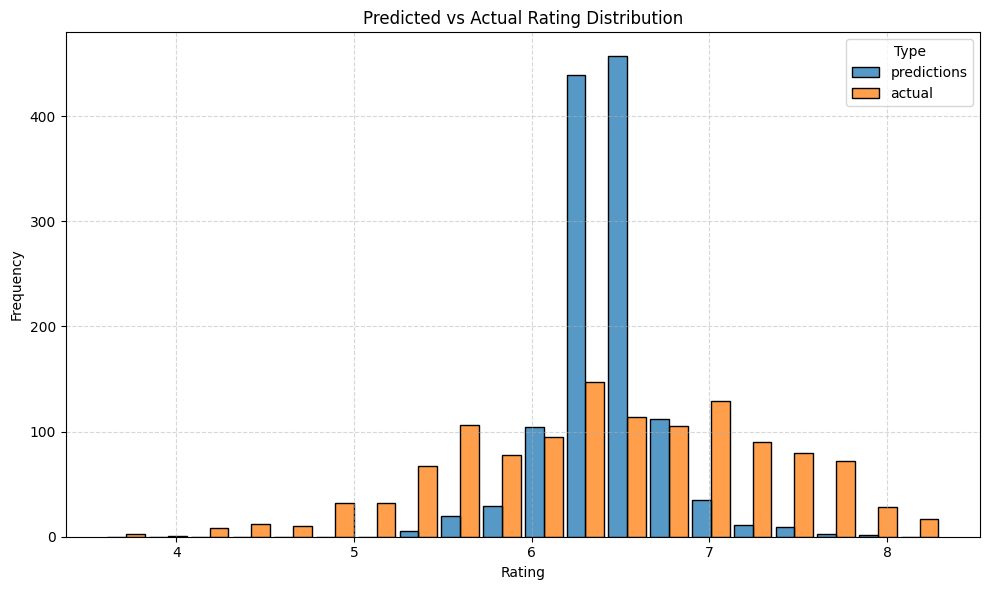

In [135]:
# Combine predictions and actual values into one DataFrame for seaborn
df_plot = pd.concat([lr_pred_df["predictions"], lr_pred_df["actual"]], axis=1).melt(var_name="Type", value_name="Rating")

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_plot,
    x="Rating",
    hue="Type",
    bins=20,
    multiple="dodge",
    shrink=0.9,
    edgecolor="black"
)

plt.title("Predicted vs Actual Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Ordinal Regression

In [136]:
# Scale and encode vote_average
df_cleaned["vote_average_scaled"] = (df_cleaned["vote_average"] * 10).astype(int)
labels, uniques = pd.factorize(df_cleaned["vote_average_scaled"])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned[columns], labels, test_size=0.2, random_state=42
)

# Train ordinal regression model
ord_model = m.LogisticIT()
ord_model.fit(X_train, y_train)

# Predict and map back to original scaled ratings
predictions = ord_model.predict(X_test)
pred_scaled = uniques[predictions]
actual_scaled = uniques[y_test]

# Scale back to float ratings (divide by 10)
pred_final = pred_scaled / 10
actual_final = actual_scaled / 10

# Evaluation
distance = pd.Series(abs(pred_final - actual_final))
ord_pred_df = pd.DataFrame({
    "predictions": pred_final,
    "actual": actual_final,
    "distance": distance
})
display(ord_pred_df.head(10))

print("Average distance: ", distance.mean())
mae = mean_absolute_error(actual_final, pred_final)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

,predictions,actual,distance
0,6.0,6.3,0.3
1,7.4,6.8,0.6
2,6.3,7.7,1.4
3,6.7,7.7,1.0
4,6.3,7.0,0.7
5,6.3,7.5,1.2
6,6.0,7.5,1.5
7,6.0,5.6,0.4
8,6.4,7.6,1.2
9,6.3,7.1,0.8


Average distance:  0.6814845024469821
Mean Absolute Error (MAE): 0.68


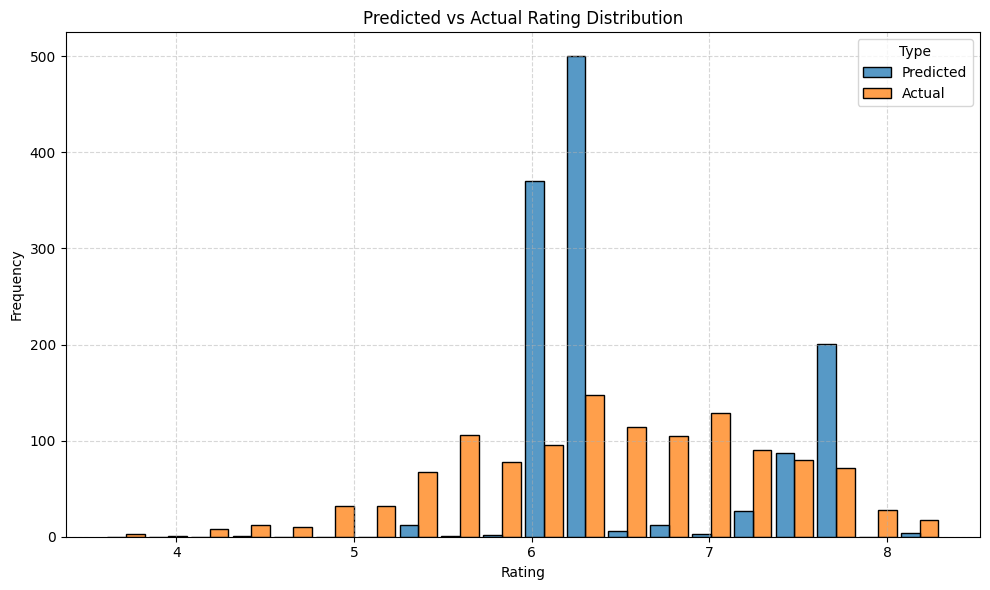

In [117]:
# Make sure these are Series
pred_final = pd.Series(pred_scaled / 10, name="Predicted")
actual_final = pd.Series(actual_scaled / 10, name="Actual")

# Combine into one DataFrame for seaborn
df_plot = pd.concat([pred_final, actual_final], axis=1).melt(var_name="Type", value_name="Rating")

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_plot,
    x="Rating",
    hue="Type",
    bins=20,
    multiple="dodge",
    shrink=0.9,
    edgecolor="black"
)

plt.title("Predicted vs Actual Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

I preformed some simple regressions using sklearn and statsmodels to test the "out of the box" functionality of linear vs ordinal regressions. I computed the mean absolute error to judge the performance of the models. Overall, the two types of models performed very similarly on the initial set of features. The next step will be to figure out how to incorporate the other variables that are not numerical in the traditional sense.